### Explore approaches for plotting data that will translate to interactive map
Use matplotlib to look how data will be plotted in map with D3

In [1]:
# import all the libraries
import numpy as np
import matplotlib as mp
import fiona
import shapely
from shapely.geometry import Polygon, LineString, Point
import pandas as pd
import geopandas as gpd
import rasterio as rio
import rasterstats as rs
import matplotlib.pyplot as plt
from rasterio.plot import show
import mapclassify
from functools import reduce

#change default figure size
plt.rcParams['figure.figsize'] = (12,12)

# show all columns
pd.set_option("display.max_columns", None)

In [5]:
#read in core dataset as data frame
# read in cdps_svis_whp shapefile as dataframe
cdps_svis_whp = pd.read_csv(r'C:\NewMapsPlus\Map698\us-communities-fire\notebooks\data\cdps_svis_whp.csv')

In [7]:
# verify read as a dataframe
type(cdps_svis_whp)

pandas.core.frame.DataFrame

In [6]:
# get info about dataframe
cdps_svis_whp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2818 entries, 0 to 2817
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2818 non-null   int64  
 1   GEOID          2818 non-null   int64  
 2   COUNTY         2818 non-null   object 
 3   FIPS           2818 non-null   int64  
 4   LOCATION       2818 non-null   object 
 5   AREA_SQMI      2818 non-null   float64
 6   AFFGEOID_x     2818 non-null   object 
 7   CDP            2818 non-null   object 
 8   ST_ABBR        2818 non-null   object 
 9   STATE          2818 non-null   object 
 10  ACRES          2818 non-null   float64
 11  WHP_CLASS_NUM  2818 non-null   float64
 12  geometry       2818 non-null   object 
 13  SE_WM          2818 non-null   float64
 14  HCD_WM         2818 non-null   float64
 15  M_WM           2818 non-null   float64
 16  HTT_WM         2818 non-null   float64
 17  OVERALL_WM     2818 non-null   float64
 18  WHP_CLAS

In [8]:
# describe the data
cdps_svis_whp.describe

<bound method NDFrame.describe of       Unnamed: 0    GEOID      COUNTY         FIPS  \
0              0   100100    Chambers   1017953800   
1              1   100460   Jefferson   1073011600   
2              2   101132  Tallapoosa   1123962000   
3              4   102860        Clay   1027959200   
4              5   103076         Lee   1081040200   
...          ...      ...         ...          ...   
2813        2849  5556125   Marquette  55077960100   
2814        2850  5571950       Vilas  55125950600   
2815        2851  5588925      Oneida  55085970800   
2816        2852  5625185    Converse  56009956600   
2817        2853  5673615     Johnson  56019955100   

                                            LOCATION  AREA_SQMI  \
0        Census Tract 9538, Chambers County, Alabama     199.11   
1        Census Tract 116, Jefferson County, Alabama      40.83   
2      Census Tract 9620, Tallapoosa County, Alabama      62.10   
3            Census Tract 9592, Clay County, Alab

In [51]:
prune=cdps_svis_whp[['CDP' ,'SE_WM', 'HCD_WM', 'M_WM', 'HTT_WM', 'OVERALL_WM']]=='Prunedale'

In [52]:
type(prune)

pandas.core.frame.DataFrame

In [53]:
prune.head()

,CDP,SE_WM,HCD_WM,M_WM,HTT_WM,OVERALL_WM
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [54]:
prune.plot.bar()

TypeError: no numeric data to plot

In [12]:
# create a series of the weighted mean values
wms = cdps_svis_whp[['CDP','SE_WM', 'HCD_WM', 'M_WM', 'HTT_WM', 'OVERALL_WM']]

In [15]:
type(wms)

pandas.core.frame.DataFrame

In [17]:
# describe the data
wms.describe()

,SE_WM,HCD_WM,M_WM,HTT_WM,OVERALL_WM
count,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000
mean,0.553510,0.597285,0.378730,0.513481,0.529351
std,0.254507,0.242215,0.213403,0.241608,0.247464
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.370000,0.420000,0.210000,0.320000,0.340000
50%,0.580000,0.620000,0.350000,0.500000,0.550000
75%,0.760000,0.790000,0.530000,0.700000,0.730000
max,1.000000,1.000000,0.960000,1.000000,1.000000


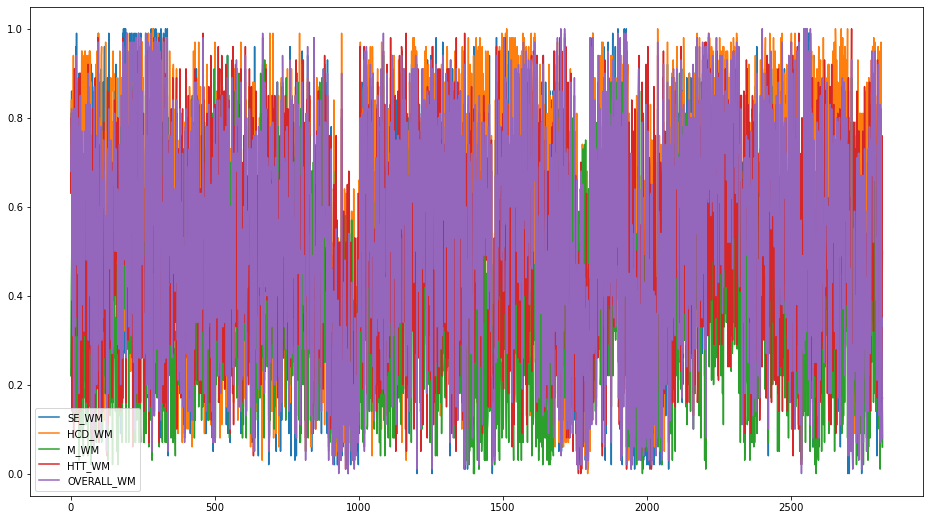

In [22]:
# test some simple plots, nothing to see here
wms.plot(figsize=(16,9));

In [43]:
prune=cdps_svis_whp['CDP']=='Prunedale'

In [46]:
prune.head()

0    False
1    False
2    False
3    False
4    False
Name: CDP, dtype: bool